In [2]:
#Our Target should be increase the f1-score of each classification or prediction high

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Data exploration(removing unneccessary columns)
df.drop('customerID', axis = 'columns', inplace = True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df1 = df[df.TotalCharges != ' ']#dropping total charges null values
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<ipython-input-9-e39f7d235675>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_churn_yes = df1[df.Churn == 'Yes'].tenure
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


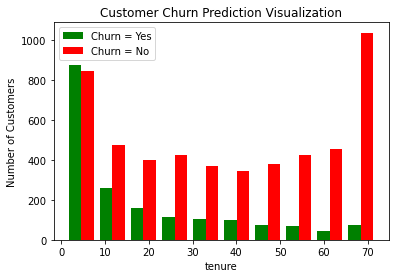

In [9]:
#Visualizing customer who are loyal vs those are not
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes, tenure_churn_no],color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

<ipython-input-10-787887bd22ec>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mc_churn_yes = df1[df.Churn == 'Yes'].MonthlyCharges


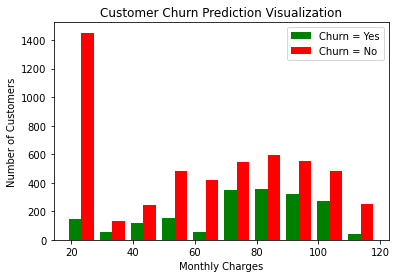

In [10]:
#Visualizing customer who are loyal vs those are not
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes, mc_churn_no],color = ['green','red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [11]:
#printing distinct values in each column
def print_unique_col_vlaues(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column}: {df1[column].unique()}')
print_unique_col_vlaues(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
#Data Cleaning
df1.replace('No internet service','No', inplace = True)
df1.replace('No phone service','No', inplace = True)
print_unique_col_vlaues(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
#Labelling: convert string to some numerical value to understable by NN

In [14]:
#Labelling columns with values :['yes', 'no']
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1 , 'No':0}, inplace = True)
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [16]:
df1['gender'].replace({'Female':1 , 'Male':0}, inplace = True)

In [17]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [18]:
#one hot encoding for more than 2 unique non-integer values
df2 = pd.get_dummies(data= df1, columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [19]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5248,1,0,1,0,12,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2030,0,0,0,1,2,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
6103,0,0,0,0,16,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4672,0,0,0,1,13,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
562,0,0,1,1,7,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [20]:
df2.dtypes#all data types are integer value

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [21]:
#scaling values: getting in the range of min and max
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [22]:
df2[cols_to_scale].sample(3)

,tenure,MonthlyCharges,TotalCharges
2401,0.140845,0.361194,0.067211
5071,0.000000,0.568159,0.006526
6714,0.169014,0.820896,0.149371


In [23]:
#train and test data

X = df2.drop('Churn', axis = 'columns')
y = df2.Churn


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 5)

In [25]:
X_train.shape

(5274, 26)

In [26]:
X_test.shape
y_test.value_counts()
#here is an imbalance because 1 class is undersamples than 0 class  

0    1267
1     491
Name: Churn, dtype: int64

In [27]:
#For imbalnce dataset

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(26, input_dim= 26, activation= 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam',
             loss = loss,
             metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs= 100, class_weight = weights) #class_weight to tackle imbalance weights(doesn't work always)
    
    print (model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report :\n", classification_report(y_test, y_preds))
    
    return y_preds

In [28]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
165/165 [==============================] - 2s 2ms/step - loss: 0.5865 - accuracy: 0.6503
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7985
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7913
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7949
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8040
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8049
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8105
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8047
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8003
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4083 - accura

165/165 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8344
Epoch 82/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8338
Epoch 83/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8338
Epoch 84/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8367
Epoch 85/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8444
Epoch 86/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8383
Epoch 87/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8322
Epoch 88/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8413
Epoch 89/100
165/165 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8290: 0s - loss: 0.3588 - ac
Epoch 90/100
165/165 [==============================] - 0s 2ms/step - l

In [29]:
#class count
count_class_0, count_class_1 = df1.Churn.value_counts()

#df divided by class
df_class_0  = df2[df2['Churn']==0]
df_class_1  = df2[df2['Churn']==1]

In [30]:
df_class_0.shape, df_class_1.shape #imbalance 

((5163, 27), (1869, 27))

# 1.Undersampling

In [31]:

df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

print("Random under sampling")
print(df_test_under.Churn.value_counts())

Random under sampling
1    1869
0    1869
Name: Churn, dtype: int64


In [32]:
#train and test data

X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 15, stratify = y) 

#stratify to distribute samples equally like only X_train don't have all truth sample


In [33]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.5985
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7473
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7708
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7770
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7720
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7758
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7752
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7785
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7712
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8212
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8253
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8232
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8318
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8280
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8219
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8286
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8273
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8275
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8190
Epoch 92/100


# 2.OverSampling

In [34]:
count_class_0, count_class_1

(5163, 1869)

In [35]:
df_class_1.shape

(1869, 27)

In [36]:
df_class_1_over = df_class_1.sample(count_class_0,replace = True)#this line will make copies of class 1 values randomly to make equal to class 0
df_class_0.shape, df_class_1_over.shape

((5163, 27), (5163, 27))

In [37]:
df_test_over = pd.concat([df_class_0, df_class_1_over],axis = 0)
df_test_over.shape

(10326, 27)

In [38]:
#train and test data

X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 15, stratify = y) 

#stratify to distribute samples equally like only X_train don't have all truth sample

In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.6141 - accuracy: 0.6511
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7565
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7664
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7673
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7700
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7632
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4700 - accuracy: 0.7708
Epoch 8/100
259/259 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.78 - 1s 2ms/step - loss: 0.4570 - accuracy: 0.7854
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.7825
Epoch 10/100
259/259 [===========================

Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8334
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8401
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8343
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8354
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8488
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8405
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8435
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8418
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8429
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3733

# 3.SMOTE

In [51]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']
X.shape, y.shape

((7032, 26), (7032,))

In [42]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [49]:
X_sm.shape, y_sm.shape

((10326, 26), (10326,))

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.2, random_state = 15, stratify = y_sm) 

In [53]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6793
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7690
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7727
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7845
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7826
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7845
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7920
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7850
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7947
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4389 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8485
Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8517
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8446
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8536
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8501
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8562
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8514
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8546
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8523
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 

# 4. Use of Ensemble with undersampling

In [54]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']
X.shape, y.shape

((7032, 26), (7032,))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y) 

y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
#we can seet that class 0 are almost 3 times of class 1

In [58]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [59]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [60]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [65]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
    
    X_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train.Churn
    
    return X_train, y_train


In [67]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.6309
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7524
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7673
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7739
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7599
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7628
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7803
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7837
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7669
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8070
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8146
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8148
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8184
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8194
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8165
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8179
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8207
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8093
Epoch 92/100


In [68]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6333 - accuracy: 0.6742
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7505
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7564
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.7680
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7779
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7704
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7673
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7723
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7657
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8293
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8276
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8113
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8052
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8337
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8176
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8270
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8130
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8227
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8210
Epoch 93/100


In [69]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.7539 - accuracy: 0.5117
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7566
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7738
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7795
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7690
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7788
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7832
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7869
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7747
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7840
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8200
Epoch 83/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8344
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8270
Epoch 85/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8253
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8416
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8249
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8177
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8285
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8297
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8301
Epoch 92/100


In [70]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0
        


In [71]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

